In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
moons = pd.read_csv('../Linear Regression/DATA/cluster_moons.csv')
circles = pd.read_csv('../Linear Regression/DATA/cluster_circles.csv')
blobs = pd.read_csv('../Linear Regression/DATA/cluster_blobs.csv')

In [9]:
def display_maps(model , data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data , x = 'X1' , y = 'X2' , hue=labels , palette = 'Set1')

C:\Users\Kandarp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


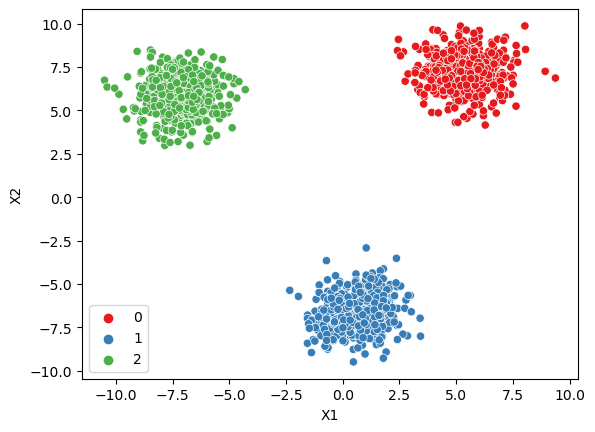

In [10]:
from sklearn.cluster import KMeans
display_maps(KMeans(n_clusters=3) , blobs)

C:\Users\Kandarp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


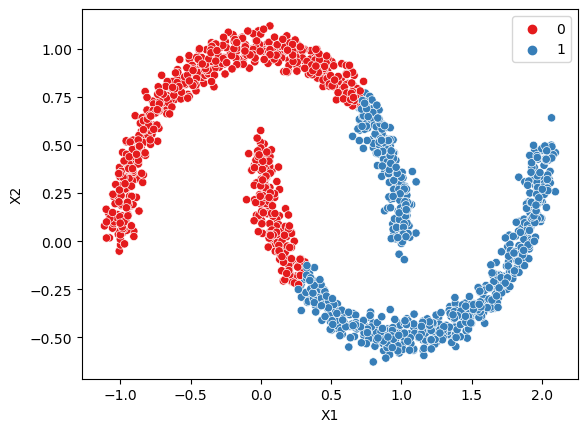

In [11]:
display_maps(KMeans(n_clusters=2) , moons)

C:\Users\Kandarp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


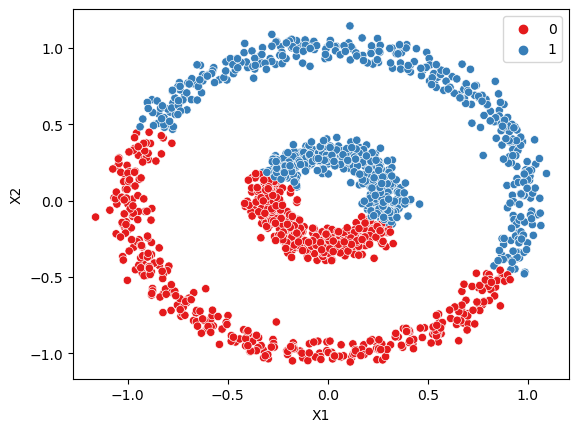

In [12]:
display_maps(KMeans(n_clusters=2) , circles)

In [16]:
from sklearn.cluster import DBSCAN

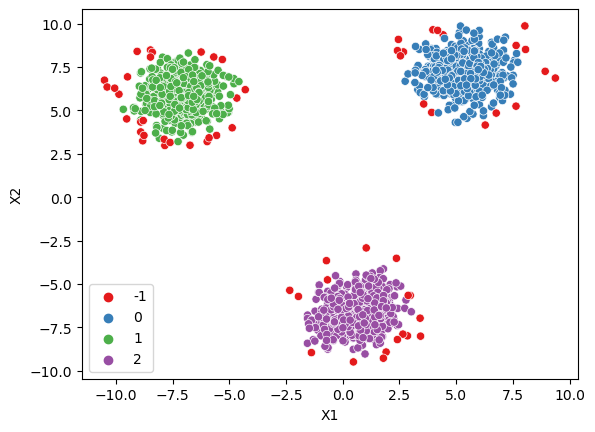

In [17]:
display_maps(DBSCAN() , blobs)

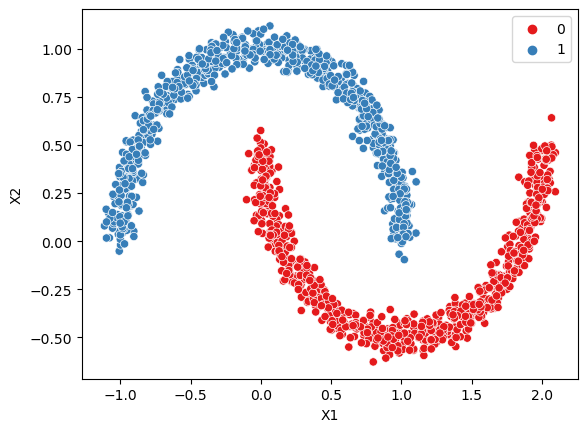

In [18]:
display_maps(DBSCAN(eps=0.15) , moons)

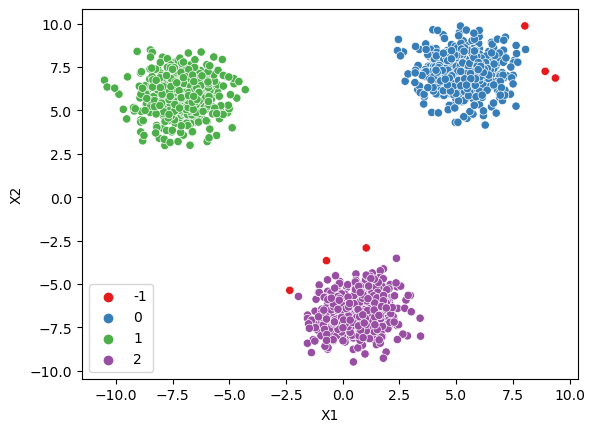

In [24]:
display_maps(DBSCAN(eps=0.9) , blobs)

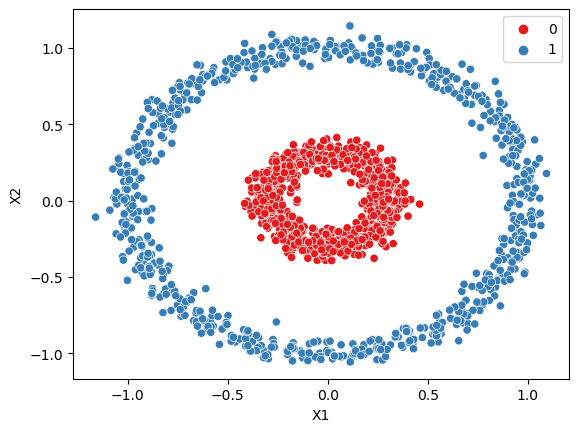

In [20]:
display_maps(DBSCAN(eps=0.15) , circles)

In [29]:
two_blobs = pd.read_csv('../Linear Regression/DATA/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('../Linear Regression/DATA/cluster_two_blobs_outliers.csv')

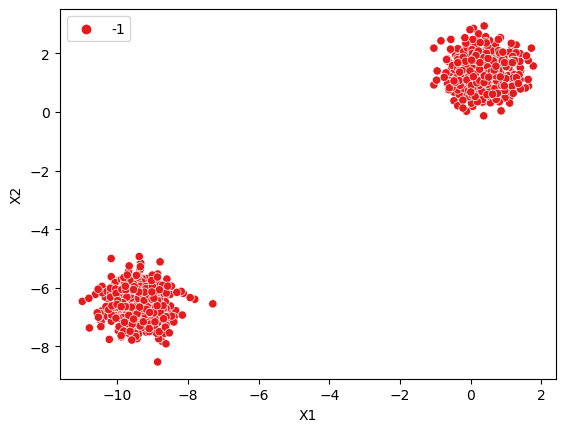

In [30]:
display_maps(DBSCAN(eps=0.001) , two_blobs)

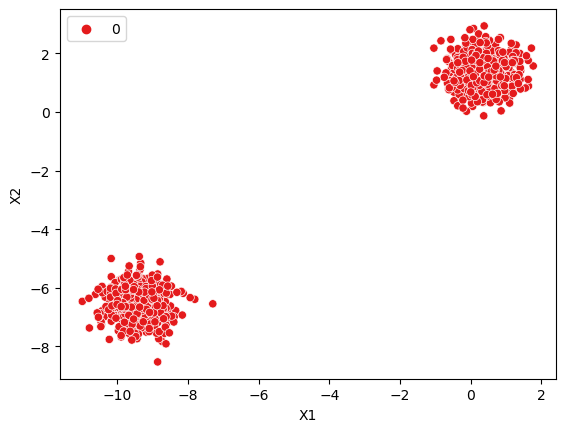

In [31]:
display_maps(DBSCAN(eps=10) , two_blobs)

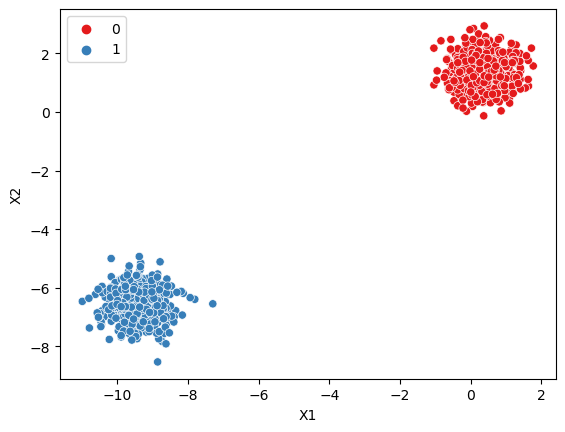

In [32]:
display_maps(DBSCAN(eps=1) , two_blobs)

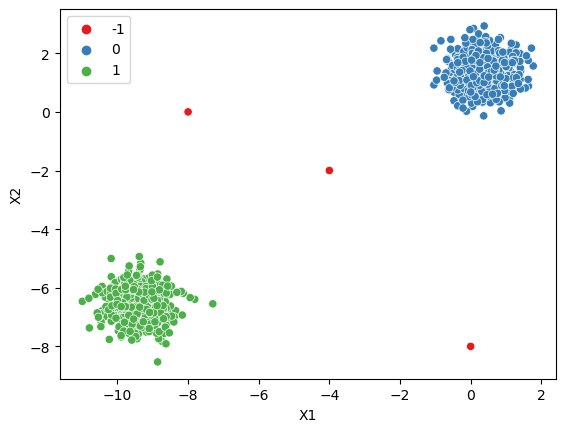

In [33]:
display_maps(DBSCAN(eps=1) , two_blobs_outliers)

In [34]:
np.sum(DBSCAN(eps=1).fit(two_blobs_outliers).labels_ == -1)

3

In [45]:
outliters_percent = []
no_of_outliers = []
for eps in np.linspace(0.001 , 7 , 200):
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(two_blobs_outliers)
    no_of_outliers.append(np.sum(dbscan.labels_ == -1))
    outliters_percent.append(100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_))

C:\Users\Kandarp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kandarp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


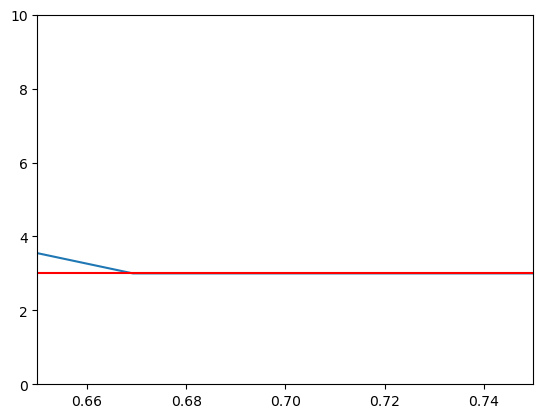

In [49]:
sns.lineplot(x = np.linspace(0.001, 7 , 200) , y = no_of_outliers)
plt.xlim(0.65,0.75)
plt.ylim(0,10)
plt.hlines(y = 3 , color='red' , xmin = 0 , xmax = 2)

In [50]:
outliters_percent = []
no_of_outliers = []
for min_num in np.arange(1,10):
    dbscan = DBSCAN(min_samples=min_num , eps = 0.67)
    dbscan.fit(two_blobs_outliers)
    no_of_outliers.append(np.sum(dbscan.labels_ == -1))
    outliters_percent.append(100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_))

C:\Users\Kandarp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kandarp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


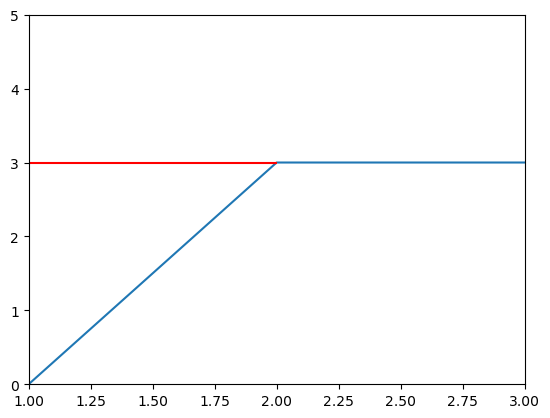

In [56]:
sns.lineplot(x = np.arange(1,10) , y = no_of_outliers)
plt.xlim(1,3)
plt.ylim(0,5)
plt.hlines(y = 3 , color='red' , xmin = 0 , xmax = 2)

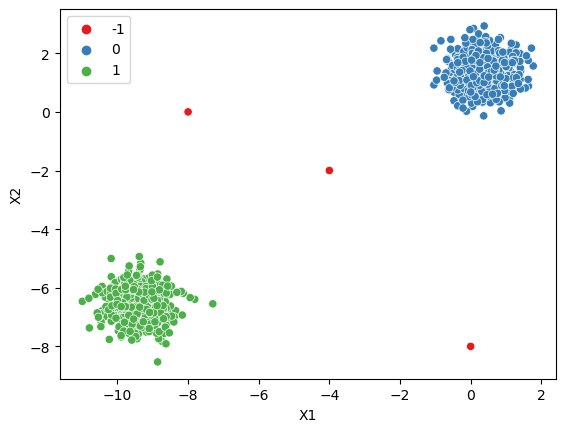

In [58]:
display_maps(DBSCAN(eps=0.67 , min_samples=2) , two_blobs_outliers)  
# This is a perfect model